In [4]:
from sklearn.model_selection import train_test_split
import os
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
# Function to preprocess an image
def preprocess_image(file_path, label, target_size=(128, 128)):
    img = load_img(file_path, target_size=target_size)
    img_array = img_to_array(img) / 255.0  # Normalize pixel values
    label = int(label)  # Assuming labels are already encoded as integers
    return img_array, label

# Specify the path to your dataset folder
dataset_path = 'dataset'

# Get the list of class folders
classes = os.listdir(dataset_path)

# Create empty lists to store file paths and corresponding labels
file_paths = []
labels = []

# Loop through each class folder
for class_name in classes:
    class_path = os.path.join(dataset_path, class_name)
    
    # Get a list of file paths in the class folder
    class_files = [os.path.join(class_path, file) for file in os.listdir(class_path)]
    
    # Append file paths and labels to the lists
    file_paths.extend(class_files)
    labels.extend([class_name] * len(class_files))

# Convert class names to numerical labels
class_to_label = {class_name: i for i, class_name in enumerate(classes)}
labels = [class_to_label[label] for label in labels]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    file_paths, labels, test_size=0.2, random_state=42)

# Preprocess the data
X_train_processed = [preprocess_image(file_path, label) for file_path, label in zip(X_train, y_train)]
X_test_processed = [preprocess_image(file_path, label) for file_path, label in zip(X_test, y_test)]

# Separate features and labels
X_train_features, y_train_labels = zip(*X_train_processed)
X_test_features, y_test_labels = zip(*X_test_processed)

# Convert labels to one-hot encoding
y_train_encoded = to_categorical(y_train_labels)
y_test_encoded = to_categorical(y_test_labels)


### Primo modello

In [45]:
# Create the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(classes), activation='softmax'))

# Compile the model
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Ensure the number of classes in the output layer matches the dataset
num_classes = len(classes)
model.add(Dense(num_classes, activation='softmax'))

# Convert labels to one-hot encoding with the correct number of classes
y_train_encoded = to_categorical(y_train_labels, num_classes=num_classes)
y_test_encoded = to_categorical(y_test_labels, num_classes=num_classes)


# Convert the lists of processed images to NumPy arrays
X_train_features = np.array(X_train_features)
X_test_features = np.array(X_test_features)

# Ensure that the input shape matches the model's expected input shape
input_shape = model.input_shape[1:]  # excluding batch size
X_train_features = X_train_features.reshape((-1,) + input_shape)
X_test_features = X_test_features.reshape((-1,) + input_shape)

# Convert labels to NumPy arrays as well
y_train_encoded = np.array(y_train_encoded)
y_test_encoded = np.array(y_test_encoded)

# Now you can train your model

hystory = model.fit(X_train_features, y_train_encoded, epochs=64, batch_size=32, verbose=1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_features, y_test_encoded)

Epoch 1/64
172/172 [==============================] - 20s 111ms/step - loss: 2.2657 - accuracy: 0.2480
Epoch 2/64
172/172 [==============================] - 18s 107ms/step - loss: 2.1602 - accuracy: 0.3376
Epoch 3/64
172/172 [==============================] - 19s 108ms/step - loss: 2.1061 - accuracy: 0.3512
Epoch 4/64
172/172 [==============================] - 18s 106ms/step - loss: 2.0385 - accuracy: 0.3904
Epoch 5/64
172/172 [==============================] - 18s 106ms/step - loss: 1.9657 - accuracy: 0.4130
Epoch 6/64
172/172 [==============================] - 18s 106ms/step - loss: 1.9723 - accuracy: 0.3846
Epoch 7/64
172/172 [==============================] - 18s 107ms/step - loss: 1.9165 - accuracy: 0.4123
Epoch 8/64
172/172 [==============================] - 18s 105ms/step - loss: 1.8551 - accuracy: 0.4263
Epoch 9/64
172/172 [==============================] - 18s 106ms/step - loss: 1.8099 - accuracy: 0.4429
Epoch 10/64
172/172 [==============================] - 18s 106ms/step - l

In [47]:
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 14, 14, 128)      

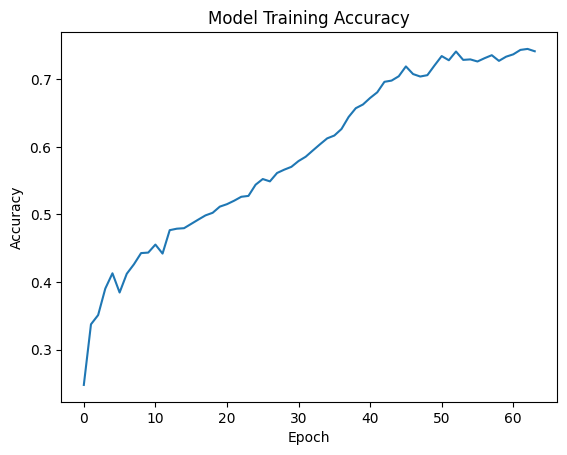

In [48]:
# Plotting the training accuracy
plt.plot(hystory.history['accuracy'])
plt.title('Model Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()


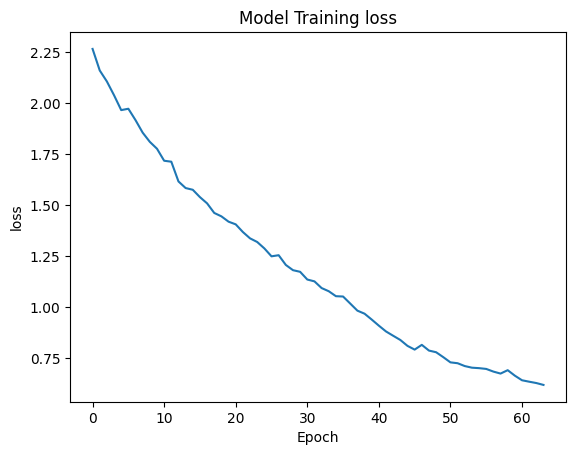

In [49]:
# Plotting the training accuracy
plt.plot(hystory.history['loss'])
plt.title('Model Training loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.show()


### Secondo Modello

In [10]:
# Crea il modello
model_2 = Sequential()

# Flattening layer per convertire l'output della convolution in un vettore
model_2.add(Flatten(input_shape=(128, 128, 3)))

# Aggiungi uno o più strati fully connected
model_2.add(Dense(256, activation='relu'))
model_2.add(Dropout(0.5))  # Dropout per ridurre l'overfitting
model_2.add(Dense(128, activation='relu'))
model_2.add(Dropout(0.5))

# Strato di output con attivazione softmax per la classificazione
model_2.add(Dense(len(classes), activation='softmax'))

# Compila il modello
model_2.compile(optimizer='adam',
                         loss='categorical_crossentropy',
                         metrics=['accuracy'])


num_classes = len(classes)
model_2.add(Dense(num_classes, activation='softmax'))

# Convert labels to one-hot encoding with the correct number of classes
y_train_encoded = to_categorical(y_train_labels, num_classes=num_classes)
y_test_encoded = to_categorical(y_test_labels, num_classes=num_classes)


# Convert the lists of processed images to NumPy arrays
X_train_features = np.array(X_train_features)
X_test_features = np.array(X_test_features)

# Ensure that the input shape matches the model's expected input shape
input_shape = model_2.input_shape[1:]  # excluding batch size
X_train_features = X_train_features.reshape((-1,) + input_shape)
X_test_features = X_test_features.reshape((-1,) + input_shape)

# Convert labels to NumPy arrays as well
y_train_encoded = np.array(y_train_encoded)
y_test_encoded = np.array(y_test_encoded)

# Now you can train your model

hystory2 = model_2.fit(X_train_features, y_train_encoded, epochs=64, batch_size=32, verbose=1)

# Evaluate the model on the test set
test_loss, test_accuracy = model_2.evaluate(X_test_features, y_test_encoded)


Epoch 1/64


172/172 [==============================] - 10s 54ms/step - loss: 2.4235 - accuracy: 0.1004
Epoch 2/64
172/172 [==============================] - 9s 54ms/step - loss: 2.3721 - accuracy: 0.1314
Epoch 3/64
172/172 [==============================] - 9s 54ms/step - loss: 2.3401 - accuracy: 0.1620
Epoch 4/64
172/172 [==============================] - 9s 54ms/step - loss: 2.3364 - accuracy: 0.1687
Epoch 5/64
172/172 [==============================] - 9s 54ms/step - loss: 2.3378 - accuracy: 0.1543
Epoch 6/64
172/172 [==============================] - 10s 57ms/step - loss: 2.3356 - accuracy: 0.1700
Epoch 7/64
172/172 [==============================] - 10s 56ms/step - loss: 2.3371 - accuracy: 0.1692
Epoch 8/64
172/172 [==============================] - 9s 55ms/step - loss: 2.3317 - accuracy: 0.1700
Epoch 9/64
172/172 [==============================] - 9s 55ms/step - loss: 2.3300 - accuracy: 0.1711
Epoch 10/64
172/172 [==============================] - 9s 55ms/step - loss: 2.3280 - a

In [42]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 49152)             0         
                                                                 
 dense_16 (Dense)            (None, 256)               12583168  
                                                                 
 dropout_10 (Dropout)        (None, 256)               0         
                                                                 
 dense_17 (Dense)            (None, 128)               32896     
                                                                 
 dropout_11 (Dropout)        (None, 128)               0         
                                                                 
 dense_18 (Dense)            (None, 11)                1419      
                                                                 
 dense_19 (Dense)            (None, 11)               

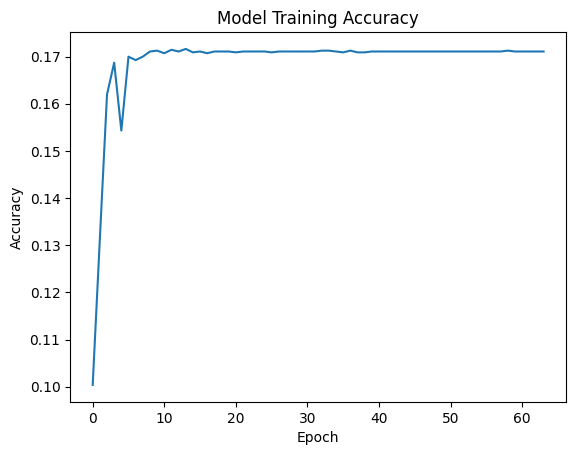

In [11]:

plt.plot(hystory2.history['accuracy'])
plt.title('Model Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()


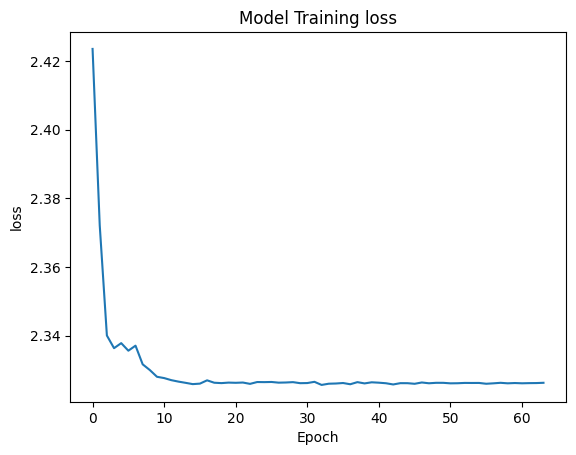

In [13]:
# Plotting the training accuracy
plt.plot(hystory2.history['loss'])
plt.title('Model Training loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.show()


# Prime 10 immagini 

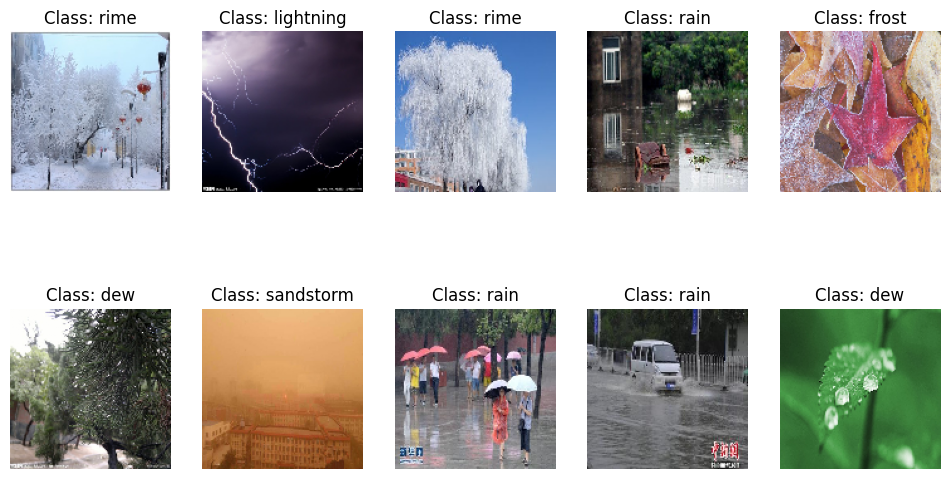

In [26]:
# Function to plot images
def plot_images(images, labels, class_name, rows=2, cols=5):
    fig, axes = plt.subplots(rows, cols, figsize=(12, 6))
    fig.subplots_adjust(hspace=0.5)
    
    for i, ax in enumerate(axes.flat):
        # Display the image
        ax.imshow(images[i])
        
        # Display the class label
        class_label = class_name[labels[i]]
        ax.set_title(f'Class: {class_label}')
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))
        
        # Hide axes
        ax.axis('off')

# Load and preprocess the first 10 images
first_10_paths = X_train[:10]
first_10_labels = y_train[:10]

first_10_images = [preprocess_image(file_path, label)[0] for file_path, label in zip(first_10_paths, first_10_labels)]

# Define class names based on your dataset
class_name = sorted(os.listdir(dataset_path))

# Plot the first 10 images
plot_images(first_10_images, first_10_labels, class_name)

# Show the plot
plt.show()


# 1 immagine per classe da mettere nella presentazione 

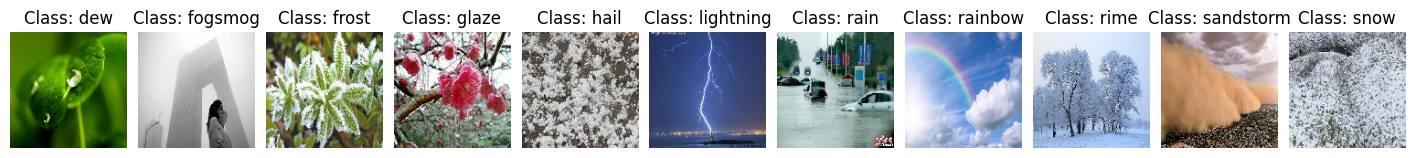

In [41]:
# Function to plot one image per class
def plot_one_image_per_class(images, labels, class_names, figsize=(18, 10)):
    fig, axes = plt.subplots(1, len(class_names), figsize=figsize)
    fig.subplots_adjust(wspace=0.1)

    for i, ax in enumerate(axes):
        # Display the image
        ax.imshow(images[i])

        # Display the class label
        class_label = class_names[labels[i]]
        ax.set_title(f'Class: {class_label}')
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))

        # Hide axes
        ax.axis('off')

# Plot one image per class with larger dimensions
plot_one_image_per_class(one_image_per_class_images, one_image_per_class_labels, class_name, figsize=(18, 10))

# Show the plot
plt.show()
